## Retrained model usage

### Importing my saved  customised CNN for classifying skin lesions

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Using Keras .save() model function again to reconstruct the model identically
reconstructed_model = keras.models.load_model('drive/MyDrive/my_model')

In [39]:
# Getting information about my saved (customised) MobileNetV2 image processing 
# skin lesion classifier
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 7)           1541511   
                                                                 
 flatten (Flatten)           (None, 343)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                22016     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1,563,982
Trainable params: 1,533,070
Non-trainable params: 30,912
_________________________________________________________________


### Start making predictions after loading saved customised model

In [40]:
reconstructed_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
from keras.preprocessing import image

test_image = image.load_img('drive/MyDrive/base_dir/val_dir/vasc/ISIC_0024747.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Predicting the result
result = reconstructed_model.predict(test_image)
print(result)

[[0.02505603 0.50205415 0.12458453 0.02097407 0.587511   0.00853884
  0.9991152 ]]


### Decoding the prediction from sample image

In [57]:
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
zip_iterator = zip(classes, result[0])
classification = dict(zip_iterator)
print(classification)

{'akiec': 0.025056034, 'bcc': 0.50205415, 'bkl': 0.124584526, 'df': 0.02097407, 'mel': 0.587511, 'nv': 0.008538842, 'vasc': 0.9991152}


In [58]:
verdict = max(classification, key=classification.get)
print('Your skin lesion is most likely:', verdict)

Your skin lesion is most likely: vasc


### Displaying sample image

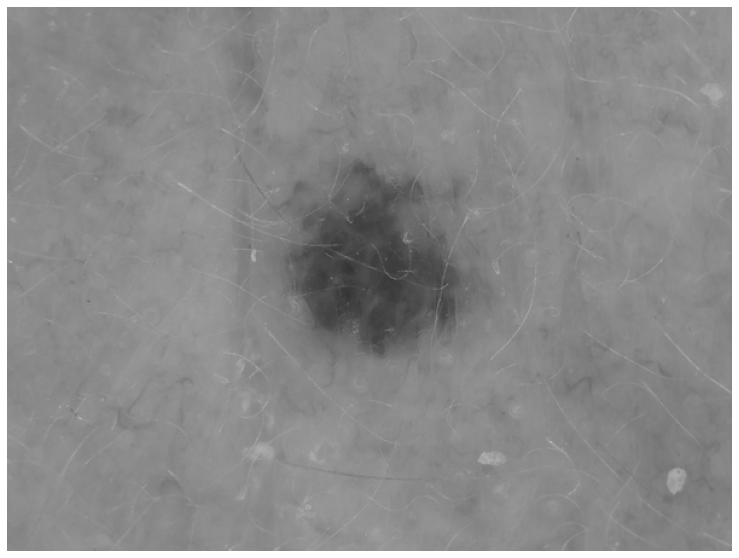

In [59]:
#%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Change display image size in notebook with matplotlib
plt.rcParams["figure.figsize"] = (20,10)

# Open the image with openCV
img = cv.imread('drive/MyDrive/base_dir/val_dir/vasc/ISIC_0024747.jpg',cv.IMREAD_GRAYSCALE)

# Display the image with openCV in notbook
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Loading with grayscale too

**NOTE:**
The sample image was taken from the validation directory inside the folder containing sample images classified as 'vasc' or vascular carcinoma. In this case, the model made a correct prediction. 